**Autor** : Renato de Moraes

**e-mail**: rntmoraes@gmail.com

# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel 

#  <a name="resumo"> RESUMO </a>
[Voltar ao índice](#indice)

### Objetivo

Construir um modelo de previsão de preço que permita que uma pessoa comum, que possui um imóvel no Rio de Janeiro, possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.


### Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que existem muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [Índice](#indice)
* [Seção 1 - Importando os Arquivos](#secao_1)
* [Seção 2 - Seleção de Colunas](#secao_2)
* [Seção 3 - Tratamento de Dados](#secao_3)  
    - [Missing Values](#secao_3.1)  
    - [Tipos de Dados](#secao_3.2)  
* [Checkpoint 1](#checkpoint_1) 
* [Seção 4 - Visualização de Dados](#secao_4)    
* [Seção 5 - Análise Exploratória e Tratamento de Dados Adicionais](#secao_5)
    - [Outliers](#secao_5.1)  
    - [Valores de Texto](#secao_5.2)  
    - [Encoding](#secao_5.3)  
* [Checkpoint 2](#checkpoint_2) 
* [Seção 6 - Modelo de Previsão](#secao_6)
* [Seção 7 - Análise do Melhor Modelo](#secao_7)

#  <a name="secao_1"> Seção 1 - Importando as bibliotecas e arquivos</a>
[Voltar ao índice](#indice)

### Importando as Bibliotecas

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Importando e Consolidando a Base de Dados

As bases de dados que importaremos é composta de 25 arquivos .csv (um para cada mês), por isso além de importar os dados temos que consolidar tudo em um único Data Frame e aproveitaremos a informação obtida no nome de cada arquivo para adcionarmos as colunas: 'mes' e 'ano'.  
Obs: Quando baixamos e descompactamos os arquivos, além dos 25 arquivos mencionados acima também temos um arquivo nomeado como 'total_data.csv' que não será utilizado por estar incompleto, por isso deve ser deletado da pasta 'dataset' antes de executar a célula abaixo:

In [2]:
caminho_bases = pathlib.Path('dataset')

base_airbnb = pd.DataFrame()

meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    ano = int(arquivo.name[-8:-4])
    
    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)
    
base_airbnb.head(3)

C:\Users\Renato\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (62,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Renato\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Renato\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
base_airbnb.shape

(902210, 108)

#  <a name="secao_2"> Seção 2 -Seleção de Colunas</a>
[Voltar ao índice](#indice)

### Identificando quais colunas podemos excluir

- Como temos muitas colunas nosso modelo pode ficar muito lento.
- Uma análise rápida permite verificar quais colunas não são necessárias para o nosso modelo.
- Por isso, devemos excluir algmas colunas da nossa base.

Tipos de colunas que vamos excluir:

1. IDs, links e informações não relevantes para o modelo
2. Colunas com informação repetidas ou extremamente parecidas. Ex. Datas vs Ano/Mês
3. Colunas com texto livre, pois não rodaremos nenhuma análise de texto/palavras chave
4. Colunas em que todos, ou quase todos, os valores são iguais


#### Criando um arquivo .csv com as mil primeiras linhas para termos um arquivo leve para visualização no Excel.

In [4]:
base_airbnb.head(1000).to_csv('Primeiras_mil_linhas.csv', sep=';')

In [5]:
print(list(base_airbnb.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

#### Checando alguns pontos observados durante a visualização das primeiras mil linhas no Excel

In [6]:
base_airbnb['experiences_offered'].value_counts()

none    902210
Name: experiences_offered, dtype: int64

In [7]:
base_airbnb['experiences_offered'].drop_duplicates()

0    none
Name: experiences_offered, dtype: object

In [8]:
(base_airbnb['host_listings_count'] == base_airbnb['host_total_listings_count']).value_counts()

True     901750
False       460
dtype: int64

In [9]:
base_airbnb['square_feet'].isna().sum()

888162

### Depois da análise qualitativa feita (no excel), levando em consideração os critérios listados acima.
### Ficamos com as seguintes colunas:

In [10]:
colunas_selecionadas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

### Criar um novo DataFrame (df1) somente com as colunas selecionadas

In [11]:
df1 = base_airbnb[colunas_selecionadas]
print('Colunas Selecionadas: {}'.format(list(base_airbnb.columns)))
display(df1)

Colunas Selecionadas: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_pric

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34325,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34326,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
34327,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


#  <a name="secao_3"> Seção 3 - Tratamento de Dados</a>
[Voltar ao índice](#indice)

##  <a name="secao_3.1"> Seção 3.1 - Missing Values</a>

### Tratar Valores Faltando

In [12]:
df1.isnull().sum()

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

#### Como o número de linhas NaN é muito alto em algumas colunas, vamos excluir essas colunas, por não serem essenciais para o modelo
#### Para isso, vamos criar um novo DF (df2) sem linhas NaN

In [13]:
df2 = pd.DataFrame()
for coluna in df1:
    if df1[coluna].isna().sum() > 300000:
        df1 = df1.drop(coluna, axis=1)

In [14]:
df1.isnull().sum()

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64

In [15]:
df1.shape

(902210, 23)

In [16]:
df2 = df1.dropna()
df2.shape

(897709, 23)

In [17]:
df2.isnull().sum()

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64

##  <a name="secao_3.2"> Seção 3.2 - Tipos de Dados</a>
[Voltar ao índice](#indice)

### Verificar Tipos de Dados em cada coluna

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897709 entries, 0 to 34328
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897709 non-null  object 
 1   host_listings_count       897709 non-null  float64
 2   latitude                  897709 non-null  float64
 3   longitude                 897709 non-null  float64
 4   property_type             897709 non-null  object 
 5   room_type                 897709 non-null  object 
 6   accommodates              897709 non-null  int64  
 7   bathrooms                 897709 non-null  float64
 8   bedrooms                  897709 non-null  float64
 9   beds                      897709 non-null  float64
 10  bed_type                  897709 non-null  object 
 11  amenities                 897709 non-null  object 
 12  price                     897709 non-null  object 
 13  guests_included           897709 non-null  in

In [19]:
df2.sample().T

,3290
host_is_superhost,f
host_listings_count,3.0
latitude,-23.070562
longitude,-43.566444
property_type,Bed and breakfast
room_type,Private room
accommodates,2
bathrooms,1.0
bedrooms,1.0
beds,1.0


#### Como as colunas "price" e "extra people" estão como objeto, temos que passá-las para float (32 - para ocupar menos espaço)

In [20]:
# Price
df2['price'] = df2['price'].str.replace('$', '')
df2['price'] = df2['price'].str.replace(',', '')
df2['price'] = df2['price'].astype(np.float32, copy=False)

# Extra People
df2['extra_people'] = df2['extra_people'].str.replace('$', '')
df2['extra_people'] = df2['extra_people'].str.replace(',', '')
df2['extra_people'] = df2['extra_people'].astype(np.float32, copy=False)

<ipython-input-20-a6eceab1ffcb>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['price'] = df2['price'].str.replace('$', '')
<ipython-input-20-a6eceab1ffcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].str.replace('$', '')
<ipython-input-20-a6eceab1ffcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] =

In [21]:
df2.dtypes

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object

###  <a name="checkpoint_1"> Checkpoint 1 - df2 </a>

In [22]:
df2.to_parquet('df2.parquet')

 Para tornar o processo mais rápido (leve), podemos iniciar, a partir desse ponto, importando o arquivo df2.parquet:

In [23]:
df2 = pd.read_parquet('df2.parquet')

#  <a name="secao_4"> Seção 4 - Visualização de Dados</a>
[Voltar ao índice](#indice)

### Visualizando os dados após seleção inicial das colunas e tratamento de valores nulos 

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897709 entries, 0 to 34328
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897709 non-null  object 
 1   host_listings_count       897709 non-null  float64
 2   latitude                  897709 non-null  float64
 3   longitude                 897709 non-null  float64
 4   property_type             897709 non-null  object 
 5   room_type                 897709 non-null  object 
 6   accommodates              897709 non-null  int64  
 7   bathrooms                 897709 non-null  float64
 8   bedrooms                  897709 non-null  float64
 9   beds                      897709 non-null  float64
 10  bed_type                  897709 non-null  object 
 11  amenities                 897709 non-null  object 
 12  price                     897709 non-null  float32
 13  guests_included           897709 non-null  in

In [25]:
df2.describe()

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,ano,mes
count,897709.000000,897709.000000,897709.000000,897709.000000,897709.000000,897709.000000,897709.000000,897709.000000,897709.000000,897709.000000,897709.000000,8.977090e+05,897709.000000,897709.000000,897709.000000
mean,8.540508,-22.965346,-43.253856,4.211794,1.695061,1.645698,2.601979,648.062195,1.677594,40.156227,4.559410,4.182215e+04,7.730099,2018.862824,6.326888
std,47.083956,0.034776,0.097373,2.613927,1.197992,1.078560,2.069426,1705.104980,1.529591,98.383331,20.889129,7.321626e+06,21.819157,0.716148,3.398323
min,0.000000,-23.073400,-43.738920,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,2018.000000,1.000000
25%,1.000000,-22.984690,-43.322560,2.000000,1.000000,1.000000,1.000000,151.000000,1.000000,0.000000,1.000000,3.000000e+01,0.000000,2018.000000,4.000000
50%,1.000000,-22.970675,-43.200070,4.000000,1.000000,1.000000,2.000000,297.000000,1.000000,0.000000,2.000000,1.125000e+03,1.000000,2019.000000,6.000000
75%,3.000000,-22.946080,-43.186930,6.000000,2.000000,2.000000,3.000000,601.000000,2.000000,50.000000,4.000000,1.125000e+03,4.000000,2019.000000,9.000000
max,1495.000000,-22.748953,-43.103709,160.000000,200.000000,45.000000,86.000000,138288.000000,36.000000,5631.000000,1224.000000,2.147484e+09,401.000000,2020.000000,12.000000


### Correlação entre as variáveis (features)

In [26]:
df2.corr()

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,ano,mes
host_listings_count,1.000000,-0.034115,0.063635,0.069320,0.022332,0.039712,0.042788,0.092306,0.041932,-0.031589,-0.006441,-0.000100,-0.025974,0.031802,-0.009584
latitude,-0.034115,1.000000,0.370416,-0.142082,-0.169135,-0.165050,-0.113931,-0.092437,-0.091123,-0.041113,-0.016090,-0.001386,-0.046044,0.002595,0.002358
longitude,0.063635,0.370416,1.000000,-0.121746,-0.170504,-0.186332,-0.110392,-0.085526,0.049375,0.001723,-0.019213,0.003403,0.135377,0.012589,-0.007981
accommodates,0.069320,-0.142082,-0.121746,1.000000,0.521909,0.675913,0.692740,0.269929,0.317563,0.078709,0.024583,-0.004242,-0.029873,-0.000808,-0.003446
bathrooms,0.022332,-0.169135,-0.170504,0.521909,1.000000,0.631544,0.491525,0.310847,0.171695,0.077831,0.035884,-0.000780,-0.069505,-0.009636,0.003829
bedrooms,0.039712,-0.165050,-0.186332,0.675913,0.631544,1.000000,0.625313,0.321678,0.259657,0.078900,0.036767,-0.002110,-0.083678,-0.007163,0.002786
beds,0.042788,-0.113931,-0.110392,0.692740,0.491525,0.625313,1.000000,0.204713,0.278757,0.077806,0.017696,-0.003065,-0.021365,-0.012212,0.000399
price,0.092306,-0.092437,-0.085526,0.269929,0.310847,0.321678,0.204713,1.000000,0.032171,0.044735,0.027418,-0.001142,-0.078023,0.017889,-0.003071
guests_included,0.041932,-0.091123,0.049375,0.317563,0.171695,0.259657,0.278757,0.032171,1.000000,0.290723,0.005280,-0.000817,0.113160,0.027499,-0.007374
extra_people,-0.031589,-0.041113,0.001723,0.078709,0.077831,0.078900,0.077806,0.044735,0.290723,1.000000,0.020384,-0.000452,0.012267,0.013560,-0.002604


<AxesSubplot:>

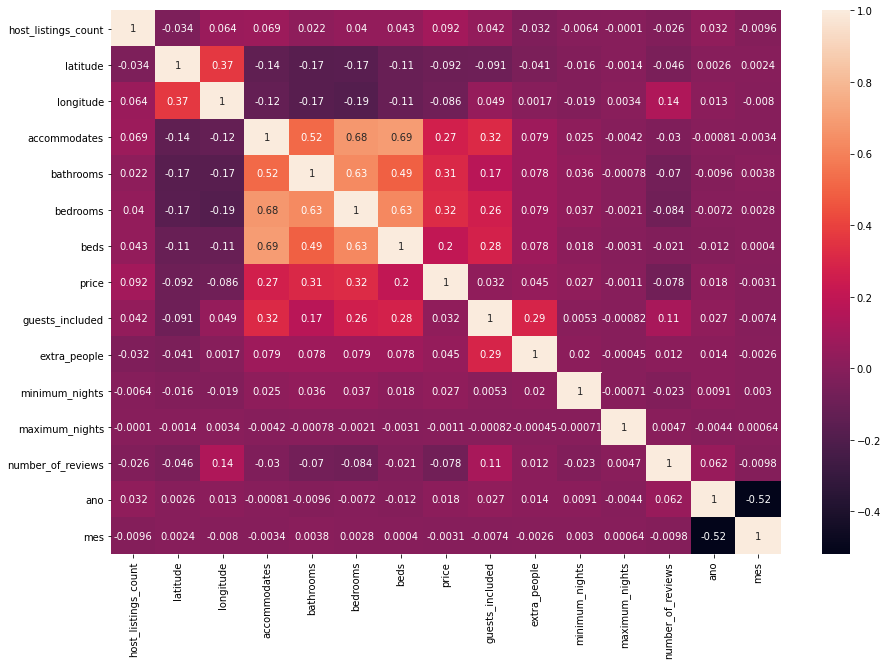

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True)

#  <a name="secao_5"> Seção 5 - Análise Exploratória e Tratamento de Dados Adicionais</a>
[Voltar ao índice](#indice)

##  <a name="secao_5.1"> Seção 5.1 - Outliers</a>

### Análise Exploratória e Tratamento de Outliers

#### Definição de funções para a análise de Outiiers
- Vamos definir algumas funções para ajudar na análise de Outliers:

In [28]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup) , :]
    linhas_excluidas = qtde_linhas - df.shape[0]
    print('Foram excluídas {:,} linhas.'.format(linhas_excluidas))
    return df 

#### Funções de gráficos
1. Boxplot - diagrama_caixa
2. Distplot - histograma

In [29]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)
    
def grafico_barras(coluna):
    plt.figure(figsize=(15, 5))
    sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    #ax.set_xlim(limites(coluna)) # para que essa linha funcione, ax deve receber a linha acima (ax = sns.barplot.....)
    plt.xlim(limites(coluna))
   

#### Analisando dados da coluna 'price'

In [30]:
limites(df2['price'])

(-524.0, 1276.0)

C:\Users\Renato\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


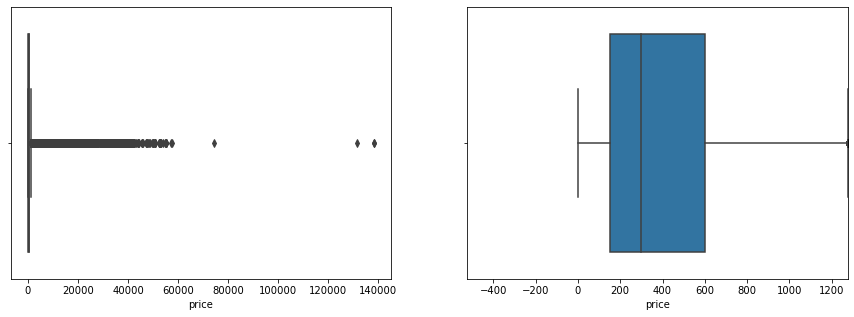

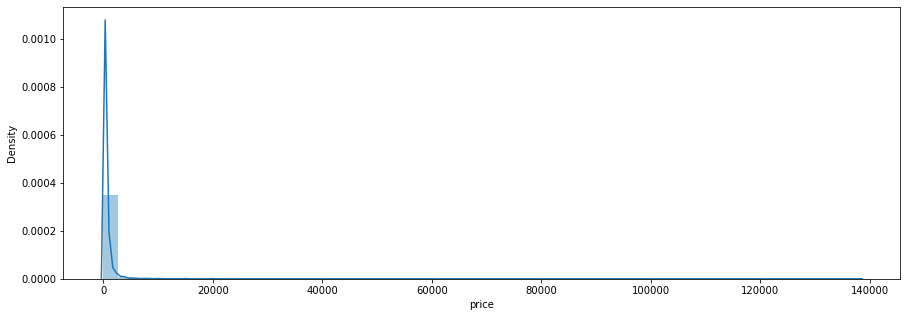

In [31]:
diagrama_caixa(df2['price'])
histograma(df2['price'])

#### Foi criada uma função para exlcuir Outliers, pois será usada para várias colunas, começando pela coluna 'price'.
- Iremos excluir os Outliers da coluna 'price' (valores acima de 1200 reais), pois nossa análise esá focada em imóveis "normais" que são alugados abaixo de valor. Não nos interressa, nesse momento, analisar imóveis de alto padrão:

In [32]:
df2.shape[0]

897709

In [33]:
df3 = excluir_outliers(df2, 'price')

Foram excluídas 87,282 linhas.


In [34]:
df3.shape[0]

810427

C:\Users\Renato\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


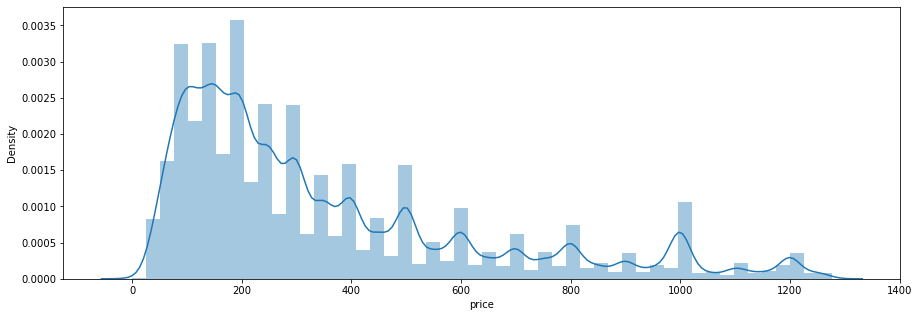

In [35]:
histograma(df3['price'])

#### Analisando dados da coluna 'extra_people'

In [36]:
limites(df3['extra_people'])

(-75.0, 125.0)

C:\Users\Renato\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


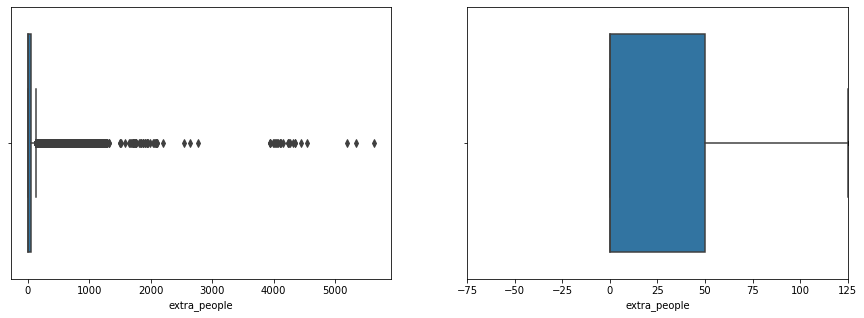

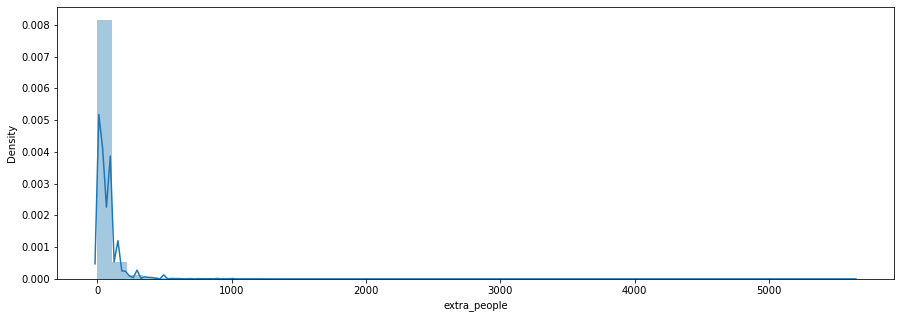

In [37]:
diagrama_caixa(df3['extra_people'])
histograma(df3['extra_people'])

#### Analisando os outliers da coluna 'extra_people', valores acima de 125.00 reais (limite superior)

In [38]:
df3['extra_people'].describe()

count    810427.000000
mean         38.392715
std          84.719193
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max        5631.000000
Name: extra_people, dtype: float64

In [41]:
df3.loc[(df3['extra_people'] > 125), 'extra_people'].shape[0]

59194

In [42]:
df3.loc[(df3['extra_people'] > 125), 'extra_people'].shape[0] / df3.shape[0]

0.07304050827526723

In [43]:
freq_ep = df3['extra_people'].value_counts()
freq_ep.head(35)

0.0      482874
50.0      57798
100.0     41190
30.0      19725
40.0      16195
80.0      15714
150.0     15530
60.0      14705
20.0      11292
70.0      10666
200.0      9806
25.0       9662
35.0       6100
90.0       5461
75.0       5272
120.0      4640
45.0       4079
250.0      3401
300.0      3269
65.0       2574
55.0       2198
500.0      1812
19.0       1609
39.0       1538
21.0       1501
180.0      1378
85.0       1373
49.0       1298
130.0      1209
110.0      1203
400.0      1107
99.0       1103
38.0       1007
95.0        814
22.0        788
Name: extra_people, dtype: int64

In [96]:
df4 = excluir_outliers(df3, 'extra_people')

Foram excluídas 59,194 linhas.


C:\Users\Renato\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



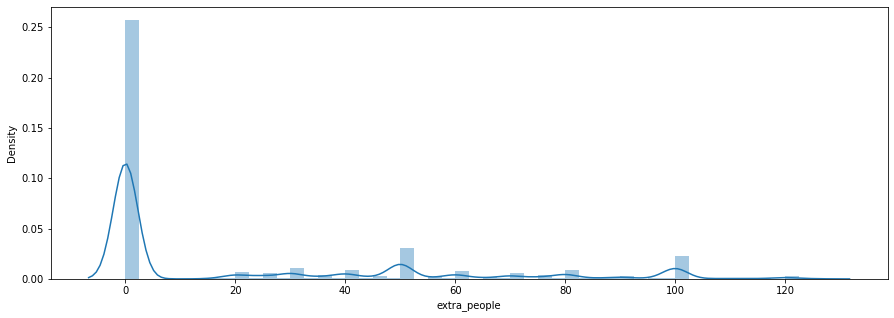

In [97]:
histograma(df4['extra_people'])

### As próximas colunas serão analisadas com gráfico de barras ao invés de histogramas.

host_listings_count    -    float64  
accommodates           -      int64  
bathrooms              -    float64  
bedrooms               -    float64  
beds                   -    float64  
guests_included        -      int64  
minimum_nights         -      int64  
maximum_nights         -      int64  
number_of_reviews      -      int64  

#### host_listings_count

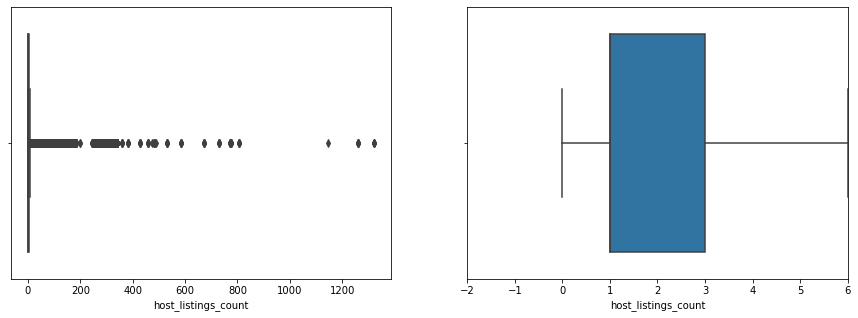

In [98]:
diagrama_caixa(df4['host_listings_count'])

In [99]:
df4['host_listings_count'].value_counts()

1.0      391506
2.0      128922
3.0       53462
4.0       31266
5.0       18732
          ...  
488.0         1
103.0         1
336.0         1
176.0         1
161.0         1
Name: host_listings_count, Length: 188, dtype: int64

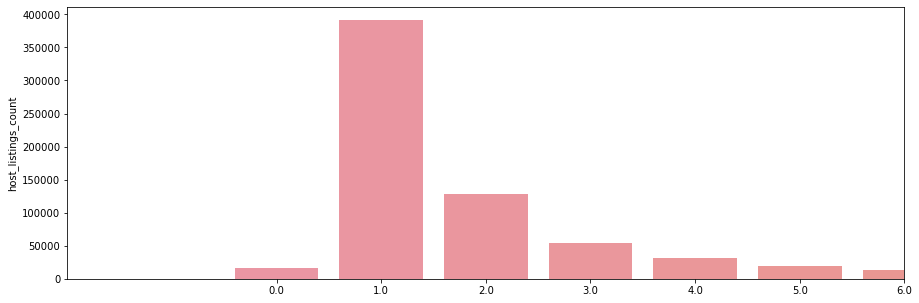

In [100]:
grafico_barras(df4['host_listings_count'])

In [101]:
df5 = excluir_outliers(df4, 'host_listings_count')

Foram excluídas 97,723 linhas.


#### accommodates 

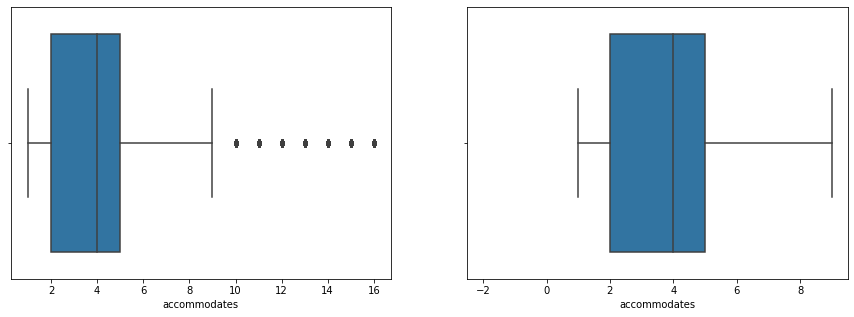

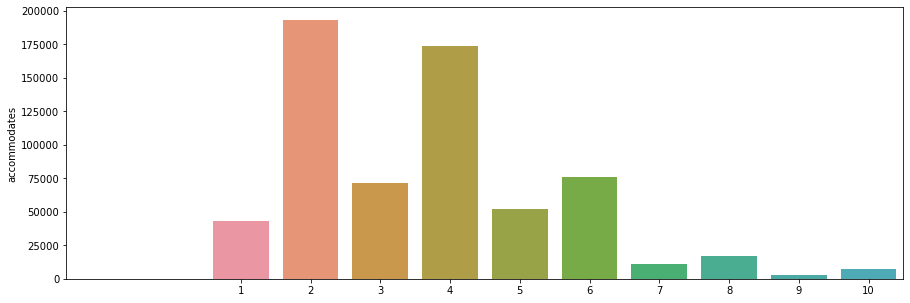

In [102]:
diagrama_caixa(df5['accommodates'])
grafico_barras(df5['accommodates'])

In [103]:
df6 = excluir_outliers(df5, 'accommodates')

Foram excluídas 13,146 linhas.


#### bathrooms

In [104]:
limites(df6['bathrooms'])

(-0.5, 3.5)

<AxesSubplot:ylabel='bathrooms'>

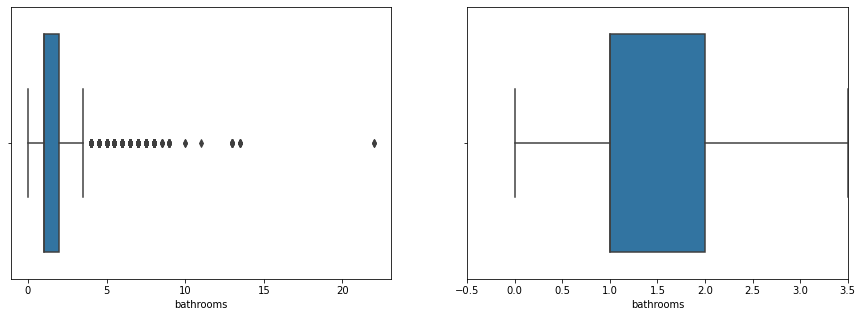

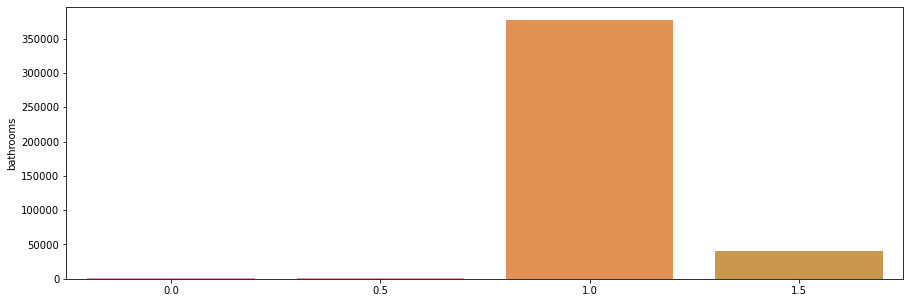

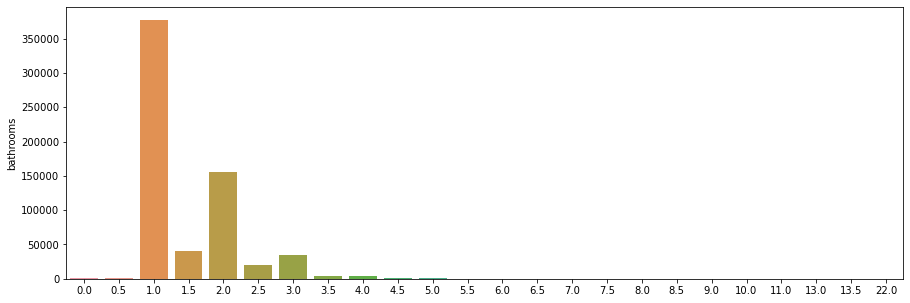

In [105]:
diagrama_caixa(df6['bathrooms'])
grafico_barras(df6['bathrooms'])
# vamos imprimir o mesmo gráfico de barras, mas agora sem xlim:
plt.figure(figsize=(15, 5))
sns.barplot(x=df6['bathrooms'].value_counts().index, y=df6['bathrooms'].value_counts())

In [106]:
df7 = excluir_outliers(df6, 'bathrooms')

Foram excluídas 6,894 linhas.


#### bedrooms

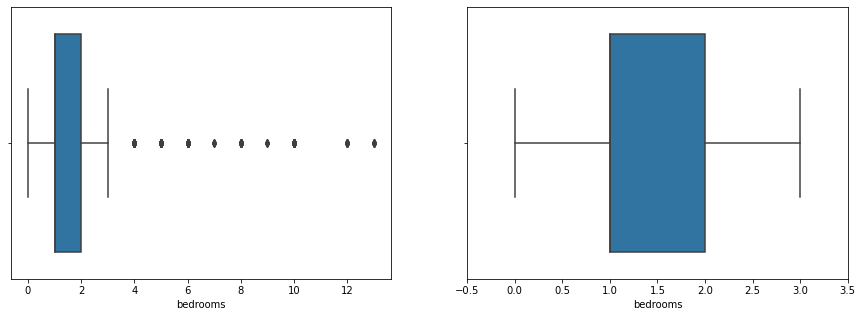

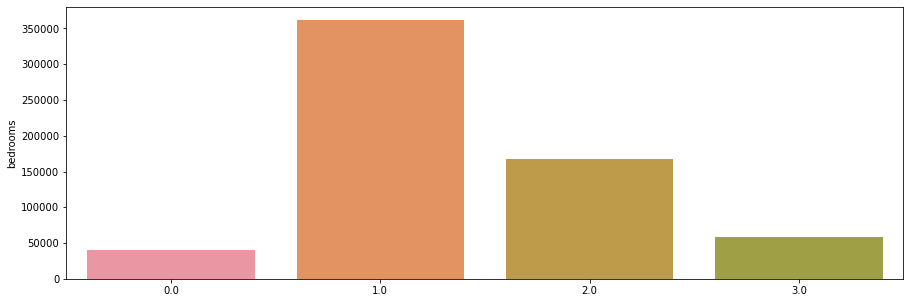

In [107]:
diagrama_caixa(df7['bedrooms'])
grafico_barras(df7['bedrooms'])

In [108]:
df8 = excluir_outliers(df7, 'bedrooms')

Foram excluídas 5,482 linhas.


#### beds

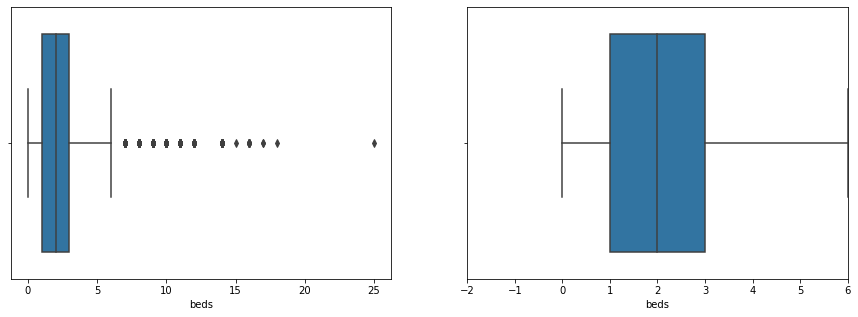

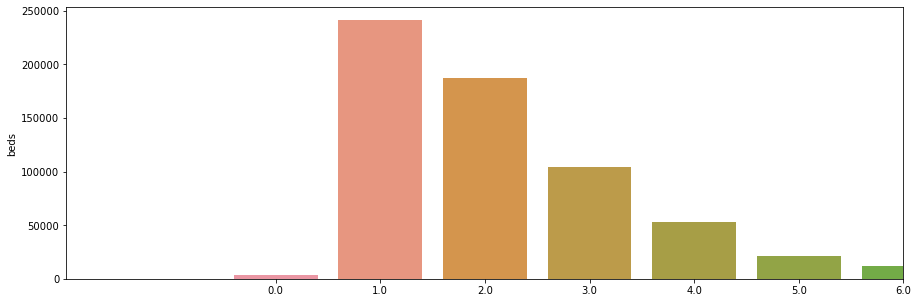

In [109]:
diagrama_caixa(df8['beds'])
grafico_barras(df8['beds'])

In [110]:
df9 = excluir_outliers(df8, 'beds')

Foram excluídas 5,622 linhas.


#### guests_included

In [111]:
limites(df9['guests_included'])

(1.0, 1.0)

In [112]:
df9.shape[0]

622366

In [113]:
df9['guests_included'].describe()

count    622366.000000
mean          1.470194
std           1.076435
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          16.000000
Name: guests_included, dtype: float64

<ipython-input-29-0a8c35013395>:5: UserWarning:

Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.

<ipython-input-29-0a8c35013395>:16: UserWarning:

Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.



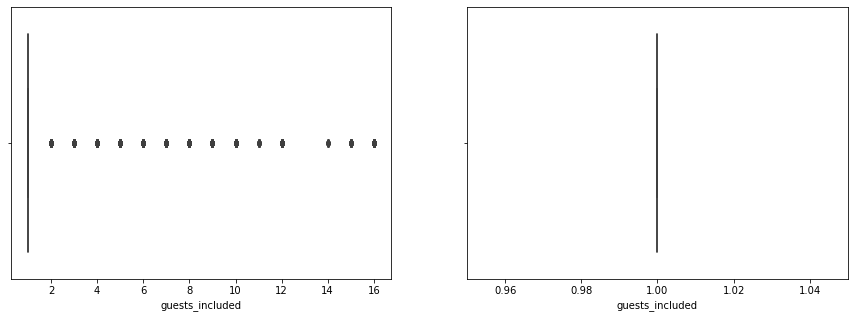

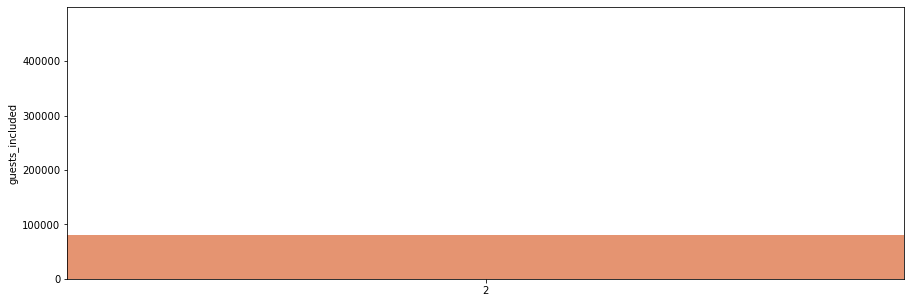

In [114]:
diagrama_caixa(df9['guests_included'])
grafico_barras(df9['guests_included'])

<AxesSubplot:ylabel='guests_included'>

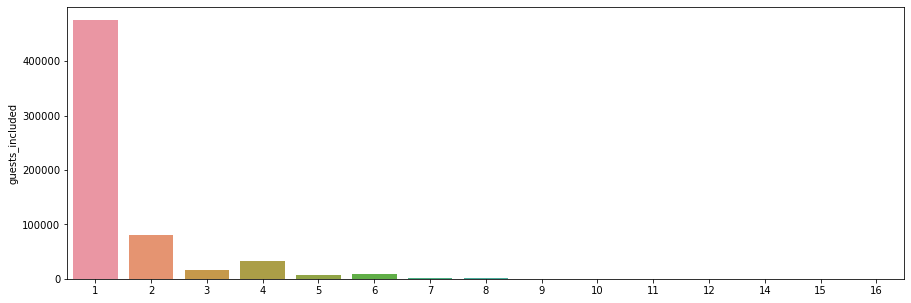

In [115]:
# vamos imprimir o mesmo gráfico de barras, mas agora sem xlim:
plt.figure(figsize=(15, 5))
sns.barplot(x=df9['guests_included'].value_counts().index, y=df9['guests_included'].value_counts())

In [116]:
df9['guests_included'].value_counts()

1     475691
2      81251
4      33378
3      15616
6       8074
5       6413
7       1009
8        595
16        87
9         82
10        65
12        57
15        23
11        15
14        10
Name: guests_included, dtype: int64

Resolvi excluir essa coluna (feature) da nossa análise, pois mais de 75% dos valores são 1 (apenas uma pessoa (guest) incluído no valor) o que indica algum tipo de erro no preenchimento (ou não preenchimento - ficando o valor padrão de 1) o que pode causar viés na análise, por isso será escluída

In [117]:
df10 = df9.drop('guests_included', axis=1)
df10.shape

(622366, 22)

#### minimum_nights

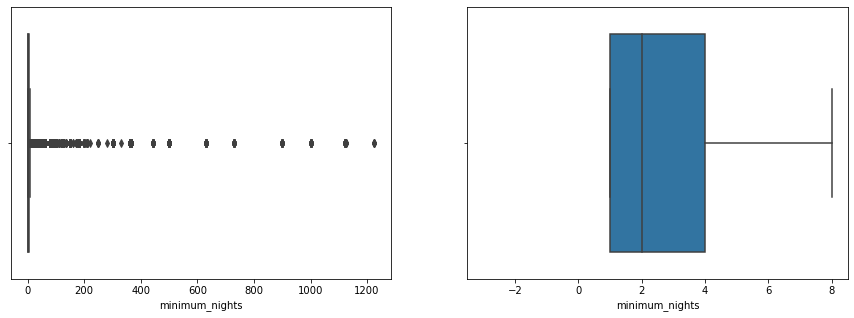

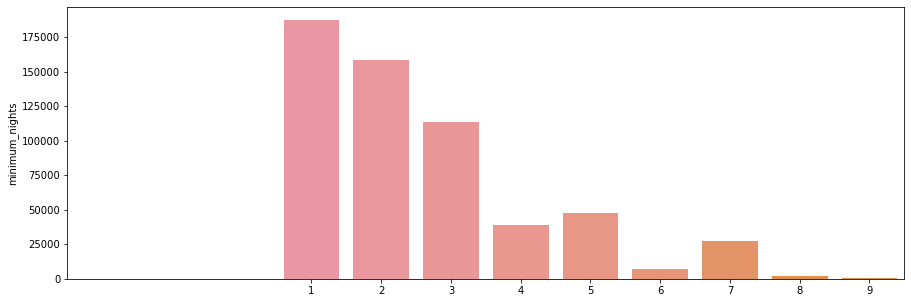

In [118]:
diagrama_caixa(df10['minimum_nights'])
grafico_barras(df10['minimum_nights'])

In [119]:
df11 = excluir_outliers(df10, 'minimum_nights')

Foram excluídas 40,383 linhas.


#### maximum_nights

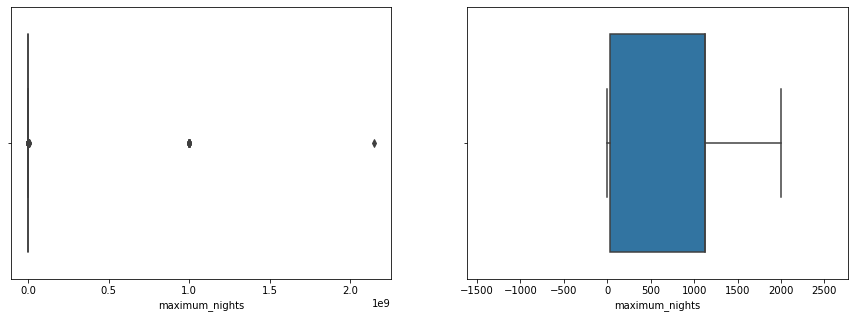

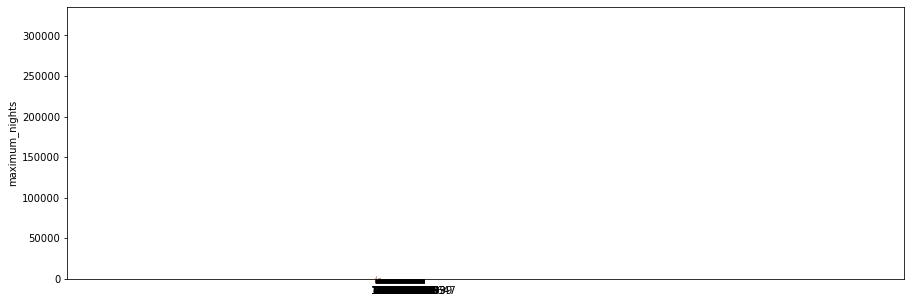

In [120]:
diagrama_caixa(df11['maximum_nights'])
grafico_barras(df11['maximum_nights'])

<AxesSubplot:ylabel='maximum_nights'>

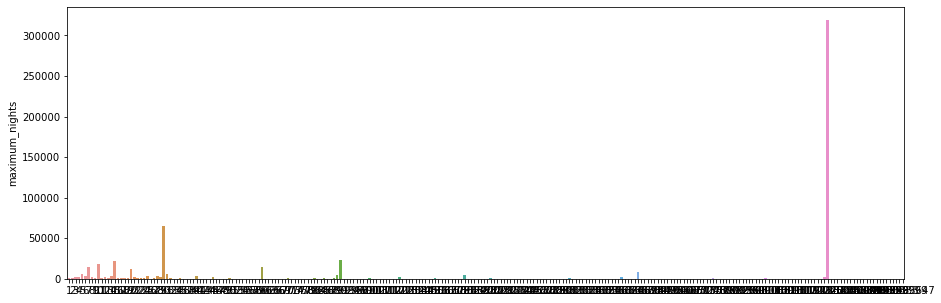

In [121]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df11['maximum_nights'].value_counts().index, y=df11['maximum_nights'].value_counts())
#number_of_reviews             int64

 A feature 'maximum_nights' será retirada da análise por não haver relevância e consistência nos valores

In [122]:
df12 = df11.drop('maximum_nights', axis=1)
df12.shape

(581983, 21)

#### number_of_reviews

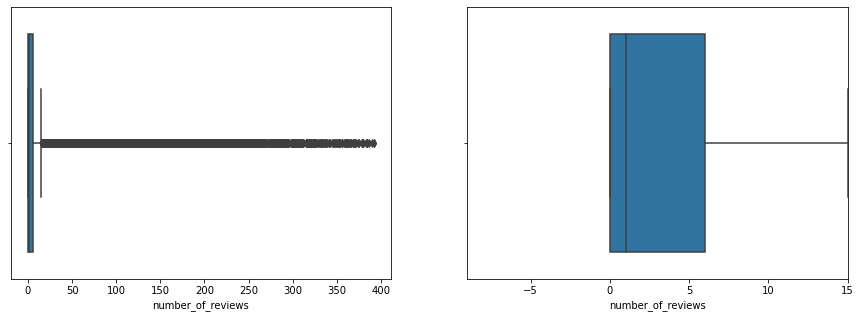

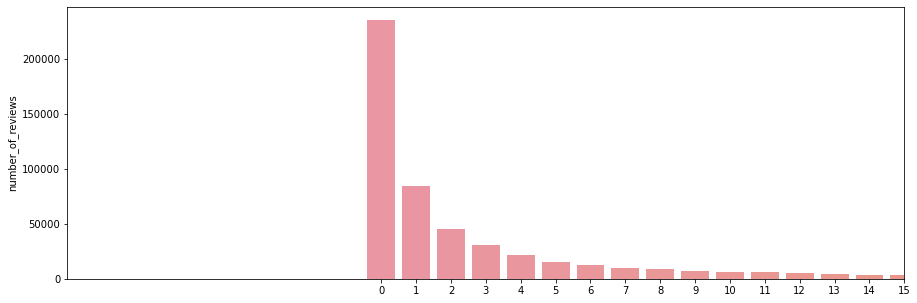

In [123]:
diagrama_caixa(df12['number_of_reviews'])
grafico_barras(df12['number_of_reviews'])

In [124]:
df13 = excluir_outliers(df12, 'number_of_reviews')

Foram excluídas 80,421 linhas.


80 mil linhas é uma quantidade muito grande para ser excluída. Na verdade não deveríamos excluir esses outliers, pois os hosts com mais reviews (mais de 20 por exemplo) devem ser os que tem os preços mais bem ajustados.
Como os usuários do nosso modelo serão pessoas que irão disponibilizar seus imóveis pela primeira vez, a feature 'number_of_reviews' não terá relevância no nosso modelo, por isso será excluída

In [125]:
df13.shape

(501562, 21)

Utilizaremos o df12 (data frame com as 80,421 linhas que foram excluídas, mas não deveriam ter sido)

In [126]:
df12 = df12.drop('number_of_reviews', axis=1)
df12.shape

(581983, 20)

##  <a name="secao_5.2"> Seção 5.2 - Valores de Texto</a>
[Voltar ao índice](#indice)

In [127]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581983 entries, 1 to 34328
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         581983 non-null  object 
 1   host_listings_count       581983 non-null  float64
 2   latitude                  581983 non-null  float64
 3   longitude                 581983 non-null  float64
 4   property_type             581983 non-null  object 
 5   room_type                 581983 non-null  object 
 6   accommodates              581983 non-null  int64  
 7   bathrooms                 581983 non-null  float64
 8   bedrooms                  581983 non-null  float64
 9   beds                      581983 non-null  float64
 10  bed_type                  581983 non-null  object 
 11  amenities                 581983 non-null  object 
 12  price                     581983 non-null  float32
 13  extra_people              581983 non-null  fl

##  Tratamento das Colunas com Valores de Texto

In [128]:
df12.sample().T

,29786
host_is_superhost,f
host_listings_count,0.0
latitude,-22.94062
longitude,-43.18073
property_type,Apartment
room_type,Entire home/apt
accommodates,5
bathrooms,2.0
bedrooms,3.0
beds,4.0


#### Listando as colunas com valores de texto:

property_type       -  Loft  
room_type	        -  Entire home/apt  
bed_type	        -  Real Bed  
amenities	        -  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  
cancellation_policy	-  strict_14_with_grace_period  

#### property_type

In [129]:
print(df12['property_type'].value_counts())

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

C:\Users\Renato\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



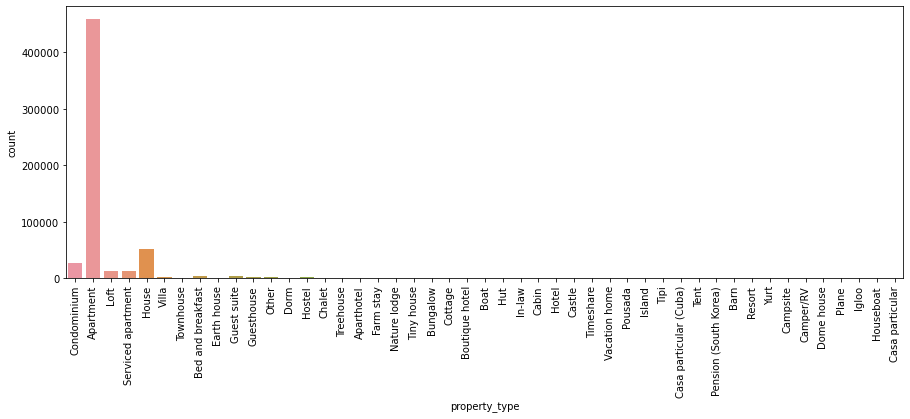

In [130]:
plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=df12)
grafico.tick_params(axis='x', rotation=90)

In [131]:
for tipo in df12['property_type'].value_counts().index:
    if df12['property_type'].value_counts()[tipo] < 2000:     
        df12.loc[df12['property_type']==tipo, 'property_type'] = 'Outros'
        
print(df12['property_type'].value_counts())    

Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


C:\Users\Renato\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



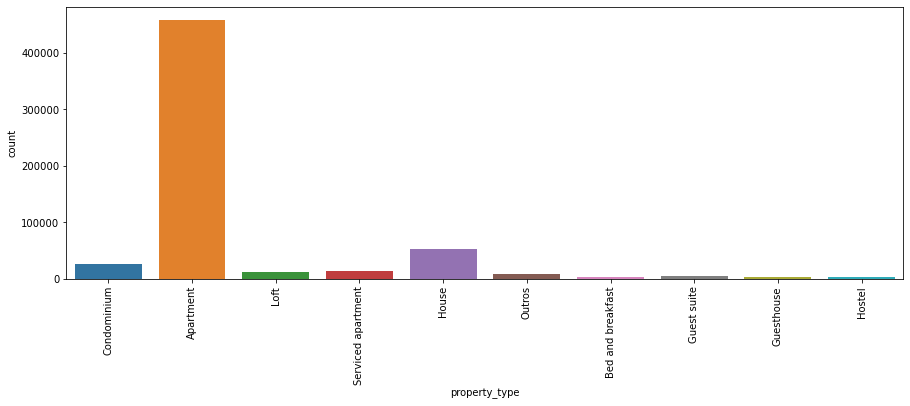

In [132]:
plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=df12)
grafico.tick_params(axis='x', rotation=90)

#### room_type

In [133]:
df12['room_type'].value_counts()

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64

#### bed_type

In [134]:
df12['bed_type'].value_counts()

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64

In [135]:
df12.loc[df12['bed_type']!='Real Bed', 'bed_type'] = 'Outros'

In [136]:
df12['bed_type'].value_counts()

Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64

#### cancellation_policy

In [137]:
df12['cancellation_policy'].value_counts()

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64

In [138]:
df12.loc[df12['cancellation_policy']=='super_strict_60', 'cancellation_policy'] = 'strict'
df12.loc[df12['cancellation_policy']=='super_strict_30', 'cancellation_policy'] = 'strict'
df12['cancellation_policy'].value_counts()

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: cancellation_policy, dtype: int64

#### amenities

In [139]:
df12['amenities'].sample()

6082    {"Cable TV",Wifi,"Air conditioning","Wheelchai...
Name: amenities, dtype: object

Como a variedade e as descrições de amenities não são consistentes, vamos utilizar como parâmetro a quantidade de amenities mencionadas pelo host

In [140]:
print(df12['amenities'].iloc[0],'\n')
print(df12['amenities'].iloc[0].split(','),'\n')
print(len(df12['amenities'].iloc[0].split(',')))

{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Smoking allowed",Doorman,Elevator,"Hot tub","Family/kid friendly","Suitable for events",Essentials,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Front desk/doorperson","Private entrance","Hot water","Bed linens","Luggage dropoff allowed"} 

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}'] 

25


In [141]:
df12['n_amenities'] = df12['amenities'].str.split(',').apply(len)
df12['n_amenities'].value_counts()

12    33569
13    33012
11    32982
14    32473
15    31153
      ...  
75        6
72        5
77        5
71        2
79        2
Name: n_amenities, Length: 78, dtype: int64

In [142]:
df12.shape

(581983, 21)

In [143]:
df13 = df12.drop('amenities', axis=1)
df13.shape

(581983, 20)

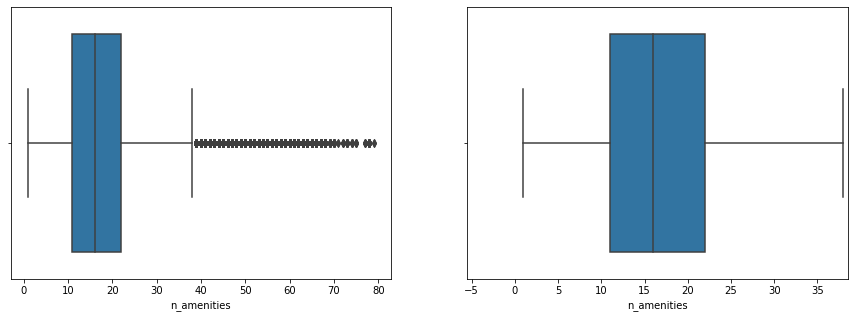

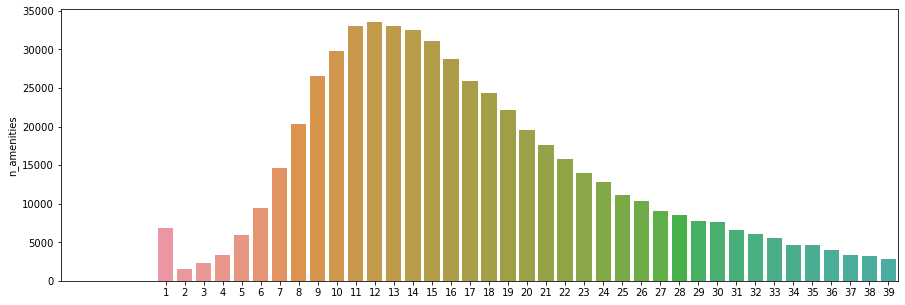

In [144]:
diagrama_caixa(df13['n_amenities'])
grafico_barras(df13['n_amenities'])

In [145]:
limites(df13['n_amenities'])

(-5.5, 38.5)

In [146]:
df14 = excluir_outliers(df13, 'n_amenities')

Foram excluídas 24,343 linhas.


### Visualização de mapa das propriedades - Mapa de Densidade (de preço)

In [ ]:
amostra = df14.sample(n=10000)
centro_mapa = {'lat': df14.latitude.mean(), 'lon': df14.longitude.mean()}
mapa = px.density_mapbox(df14, lat='latitude', lon='longitude', z='price', radius=2.5,
                        center=centro_mapa, zoom=10, mapbox_style = 'stamen-terrain')
mapa.show()

##  <a name="secao_5.3"> Seção 5.3 - Encoding</a>
[Voltar ao índice](#indice)

### Encoding

É necessário ajustar as features para vabilizar o processamento do nosso futuro modelo (categorias, true/false, etc)
- Features de valores True ou False serão substituídas por True=1 e False=0
- Para as features de categorias usaremos o método de variáveis dummies

In [147]:
 df14.sample().T

,18059
host_is_superhost,f
host_listings_count,1.0
latitude,-23.00973
longitude,-43.30211
property_type,Apartment
room_type,Private room
accommodates,3
bathrooms,1.0
bedrooms,1.0
beds,1.0


In [148]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
colunas_categorias = ['property_type', 'room_type', 'cancellation_policy']
df14.bed_type.value_counts()

Real Bed    546567
Outros       11073
Name: bed_type, dtype: int64

In [149]:
df14.loc[df14.bed_type == 'Real Bed', 'bed_type']=1
df14.loc[df14.bed_type == 'Outros', 'bed_type']=0

C:\Users\Renato\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
df14.bed_type.value_counts()

1    546567
0     11073
Name: bed_type, dtype: int64

In [151]:
for coluna in colunas_tf:
    df14.loc[df14[coluna] == 't', coluna]=1
    df14.loc[df14[coluna] == 'f', coluna]=0

In [152]:
df14[colunas_categorias].head()

,property_type,room_type,cancellation_policy
1,Condominium,Entire home/apt,strict
3,Apartment,Entire home/apt,strict
4,Apartment,Entire home/apt,strict
5,Apartment,Entire home/apt,strict
6,Loft,Entire home/apt,strict


In [153]:
df15 = pd.get_dummies(data=df14, columns=colunas_categorias)

In [154]:
df15.sample().T

,12766
host_is_superhost,0
host_listings_count,2.0
latitude,-22.984491
longitude,-43.203295
accommodates,6
bathrooms,3.0
bedrooms,2.0
beds,4.0
bed_type,1
price,601.0


In [155]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557640 entries, 1 to 34328
Data columns (total 35 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   host_is_superhost                                557640 non-null  object 
 1   host_listings_count                              557640 non-null  float64
 2   latitude                                         557640 non-null  float64
 3   longitude                                        557640 non-null  float64
 4   accommodates                                     557640 non-null  int64  
 5   bathrooms                                        557640 non-null  float64
 6   bedrooms                                         557640 non-null  float64
 7   beds                                             557640 non-null  float64
 8   bed_type                                         557640 non-null  object 
 9   price           

###  <a name="checkpoint_2"> Checkpoint 2 - df15 </a>

### Data Frame preprocessado pronto para o modelo de previsão

In [156]:
df15.to_parquet('df15.parquet')

#  <a name="secao_6"> Seção 6 - Modelo de Previsão</a>
[Voltar ao índice](#indice)

Carregando o DF df15, ja preparado (formatado) para aprendizagem e teste

In [ ]:
df15 = pd.read_parquet('df15.parquet')

Importando as Bibliotécas/Módulos do SciKit Learn

In [157]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

- Separando as colunas:
X = 'Features'
da coluna 
y = 'Prediction Target'

In [158]:
y = df15.price
X = df15.drop('price', axis=1)

- Separando os valores de treino (train_X e train_y) e teste (val_X e val_y)

In [159]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=10)

- Instanciando os modelos:
    - Linear Regression
    - Random Forest Regressor
    - Extra Trees Regressor

In [160]:
modelo_lr = LinearRegression()
modelo_rf = RandomForestRegressor()
modelo_et = ExtraTreesRegressor()

#### Treinando e testando o Modelo: Linear Regression

In [161]:
modelo_lr.fit(train_X, train_y)
val_predictions = modelo_lr.predict(val_X)

- Medindo (os resultados do) Modelo Linear Regression

In [162]:
r2 = r2_score(val_y, val_predictions)
rmse = np.sqrt(mean_squared_error(val_y, val_predictions))
print('R2: {:.2%}, RMSE: {:.2f}'.format(r2, rmse))

R2: 32.70%, RMSE: 217.54


#### Treinando e testando o Modelo: Random Forest Regressor

In [163]:
modelo_rf.fit(train_X, train_y)
val_predictions_rf = modelo_rf.predict(val_X)

- Medindo (os resultados do) Modelo Random Forest Regressor

In [164]:
r2 = r2_score(val_y, val_predictions_rf)
rmse = np.sqrt(mean_squared_error(val_y, val_predictions_rf))
print('R2: {:.2%},\nRMSE: {:.2f}'.format(r2, rmse))

R2: 97.24%,
RMSE: 44.07


#### Treinando e testando o Modelo: Extra Trees Regressor

In [165]:
modelo_et.fit(train_X, train_y)
val_predictions_et = modelo_et.predict(val_X)

- Medindo (os resultados do) Modelo Extra Trees Regressor

In [166]:
r2 = r2_score(val_y, val_predictions_et)
rmse = np.sqrt(mean_squared_error(val_y, val_predictions_et))
print(f'R2: {r2:.2%}\nRMSE: {rmse:.2f}')

R2: 97.49%
RMSE: 41.97


#  <a name="secao_7"> Seção 7 - Análise do Melhor Modelo</a>
[Voltar ao índice](#indice)

In [167]:
importances_valores = modelo_et.feature_importances_
colunas_X = X.columns

df_imp = pd.DataFrame(importances_valores, colunas_X)
display(df_imp)

,0
host_is_superhost,0.012988
host_listings_count,0.039712
latitude,0.103840
longitude,0.101778
accommodates,0.075764
bathrooms,0.066879
bedrooms,0.117242
beds,0.052896
bed_type,0.005209
extra_people,0.087930


,0
bedrooms,0.117242
latitude,0.103840
longitude,0.101778
n_amenities,0.089179
extra_people,0.087930
accommodates,0.075764
bathrooms,0.066879
minimum_nights,0.064877
room_type_Entire home/apt,0.061776
beds,0.052896


<AxesSubplot:xlabel='0'>

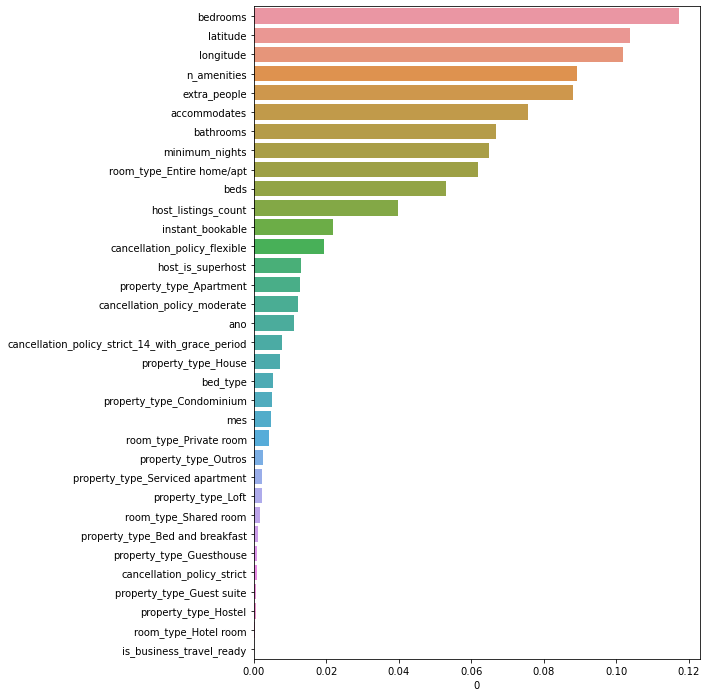

In [168]:
df_imp = df_imp.sort_values(by=0, ascending=False)
display(df_imp)
plt.figure(figsize=(8, 12))
sns.barplot(x=df_imp[0], y=df_imp.index)

### Ajustes e Melhorias no Melhor Modelo

In [169]:
df_imp.index

Index(['bedrooms', 'latitude', 'longitude', 'n_amenities', 'extra_people',
       'accommodates', 'bathrooms', 'minimum_nights',
       'room_type_Entire home/apt', 'beds', 'host_listings_count',
       'instant_bookable', 'cancellation_policy_flexible', 'host_is_superhost',
       'property_type_Apartment', 'cancellation_policy_moderate', 'ano',
       'cancellation_policy_strict_14_with_grace_period',
       'property_type_House', 'bed_type', 'property_type_Condominium', 'mes',
       'room_type_Private room', 'property_type_Outros',
       'property_type_Serviced apartment', 'property_type_Loft',
       'room_type_Shared room', 'property_type_Bed and breakfast',
       'property_type_Guesthouse', 'cancellation_policy_strict',
       'property_type_Guest suite', 'property_type_Hostel',
       'room_type_Hotel room', 'is_business_travel_ready'],
      dtype='object')

In [170]:
new_X = X.drop(['property_type_Serviced apartment', 'property_type_Loft', 'property_type_Outros', 
               'room_type_Shared room', 'property_type_Bed and breakfast', 'property_type_Guesthouse',  'cancellation_policy_strict', 
              'property_type_Guest suite', 'property_type_Hostel', 'room_type_Hotel room',
                'is_business_travel_ready'], axis=1)

In [171]:
new_X.columns

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment', 'property_type_Condominium',
       'property_type_House', 'room_type_Entire home/apt',
       'room_type_Private room', 'cancellation_policy_flexible',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')

#### Treinando novamente o Modelo: Extra Trees Regressor - com o new_X para avaliar o impacto do 'drop' de 11 colunas (features)

In [172]:
train_new_X, val_new_X, train_y, val_y = train_test_split(new_X, y, random_state=10)

In [173]:
modelo_et.fit(train_new_X, train_y)
new_val_predictions_et = modelo_et.predict(val_new_X)

#### Comparando com os resultados antes do 'drop':  
    * R2: 97.49%  
    * RMSE: 41.97  

In [174]:
r2 = r2_score(val_y, new_val_predictions_et)
rmse = np.sqrt(mean_squared_error(val_y, new_val_predictions_et))
print(f'R2: {r2:.2%}\nRMSE: {rmse:.2f}')

R2: 97.51%
RMSE: 41.84


Conforme resultado acima, a exclusão das 11 features menos relevantes não teve impacto negativo na performance do modelo: Extra Trees Regressor.

#### Agora será salvo um arquivo (modelo.joblib) com o modelo_et (Extra Trees) já treinado (com todas as colunas do df15), conforme resultados acima

In [175]:
import joblib
joblib.dump(modelo_et, 'modelo.joblib')

['modelo.joblib']

Novos treinamentos, testes, métricas e modelagens podem ser realizados no Google Colab (devido a melhor performance). 
Para isso, segue abaixo o df_modelagem, com a versão final.

In [176]:
cols = list(new_X.columns)
cols.append('price')
df_modelagem = df15[cols]
df_modelagem.to_parquet('df_modelagem')